In [30]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
# sentiment analysis 

import warnings
warnings.filterwarnings('ignore')
import re
from wordcloud import WordCloud, STOPWORDS
#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo

from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

## Converting Json files to Dataframe

###### Review file

In [2]:
#since pd.readjson will cause memeory error, we read the file line by line
path = 'yelp_academic_dataset_review.json'
review = []
with open(path, encoding = 'utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        review.append(line_contents)

In [3]:
review = pd.DataFrame(review)
review.shape

(6990280, 9)

In [4]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [5]:
#review.to_csv('yelp_review.csv')

###### User file

In [6]:
#since pd.readjson will cause memeory error, we read the file line by line
path = 'yelp_academic_dataset_user.json'
user = []
with open(path, encoding = 'utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        user.append(line_contents)

In [7]:
user = pd.DataFrame(user)
user.shape

(1987897, 22)

In [8]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [9]:
#user.to_csv('yelp_user.csv')

###### Business file

In [10]:
#since pd.readjson will cause memeory error, we read the file line by line
path = 'yelp_academic_dataset_business.json'
business = []
with open(path, encoding = 'utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        business.append(line_contents)

In [11]:
business = pd.DataFrame(business)
business.shape

(150346, 14)

In [12]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [13]:
#business.to_csv('yelp_business.csv')

## Data Cleaning

### First we will chek the columns of the business data


In [177]:
business =pd.read_csv("yelp_business.csv")

In [178]:
business.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [179]:
business.isnull().sum()

Unnamed: 0          0
business_id         0
name                0
address          5127
city                0
state               0
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [180]:
# Taking into the consideration the businesses which are open 
# 1 = open, 0 = closed
business = business[business['is_open']==1]

In [181]:
business.isnull().sum()

Unnamed: 0          0
business_id         0
name                0
address          4643
city                0
state               0
postal_code        40
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      12348
categories         95
hours           16095
dtype: int64

In [182]:
# let remove the rows for which categories are not mentioned
business.dropna(subset=['categories'], inplace=True)

In [183]:
business

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471658,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",NaN
150344,150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


Text(0.5, 1.0, 'North America Region')

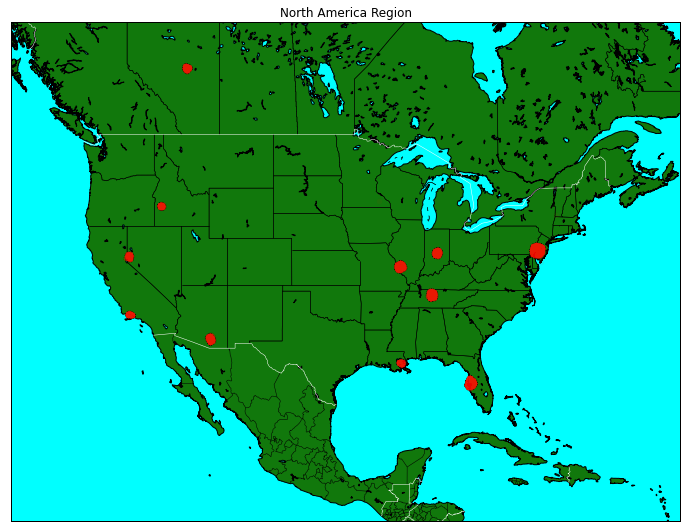

In [184]:
# Sample it down to only the North America region 
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)
#apply the selector to subset
NA_business=business[idx_NA]

#initiate the figure
plt.figure(figsize=(12,15))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.drawcoastlines()
m2.drawmapboundary(fill_color='aqua')                # aqua background
m2.fillcontinents(color='#11780C',lake_color='aqua')  # dark green land, aqua lakes
m2.drawstates(linewidth=0.5, color="black")
m2.drawcountries(linewidth=0.5, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=30, c="#FB1903", lw=0, alpha=0.05, zorder =20)

plt.title("North America Region")

In [185]:
business_overall = business.assign(categories = business.categories.str.split(', ')).explode('categories')
cat = business_overall.categories.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['Categories', 'Count']
cat

,Categories,Count
0,Restaurants,34987
1,Food,20419
2,Shopping,20186
3,Home Services,13322
4,Beauty & Spas,12263
...,...,...
1297,Props,1
1298,Calabrian,1
1299,DUI Schools,1
1300,Fuel Docks,1


In [186]:
cat= cat.sort_values(by = 'Count', ascending = False)

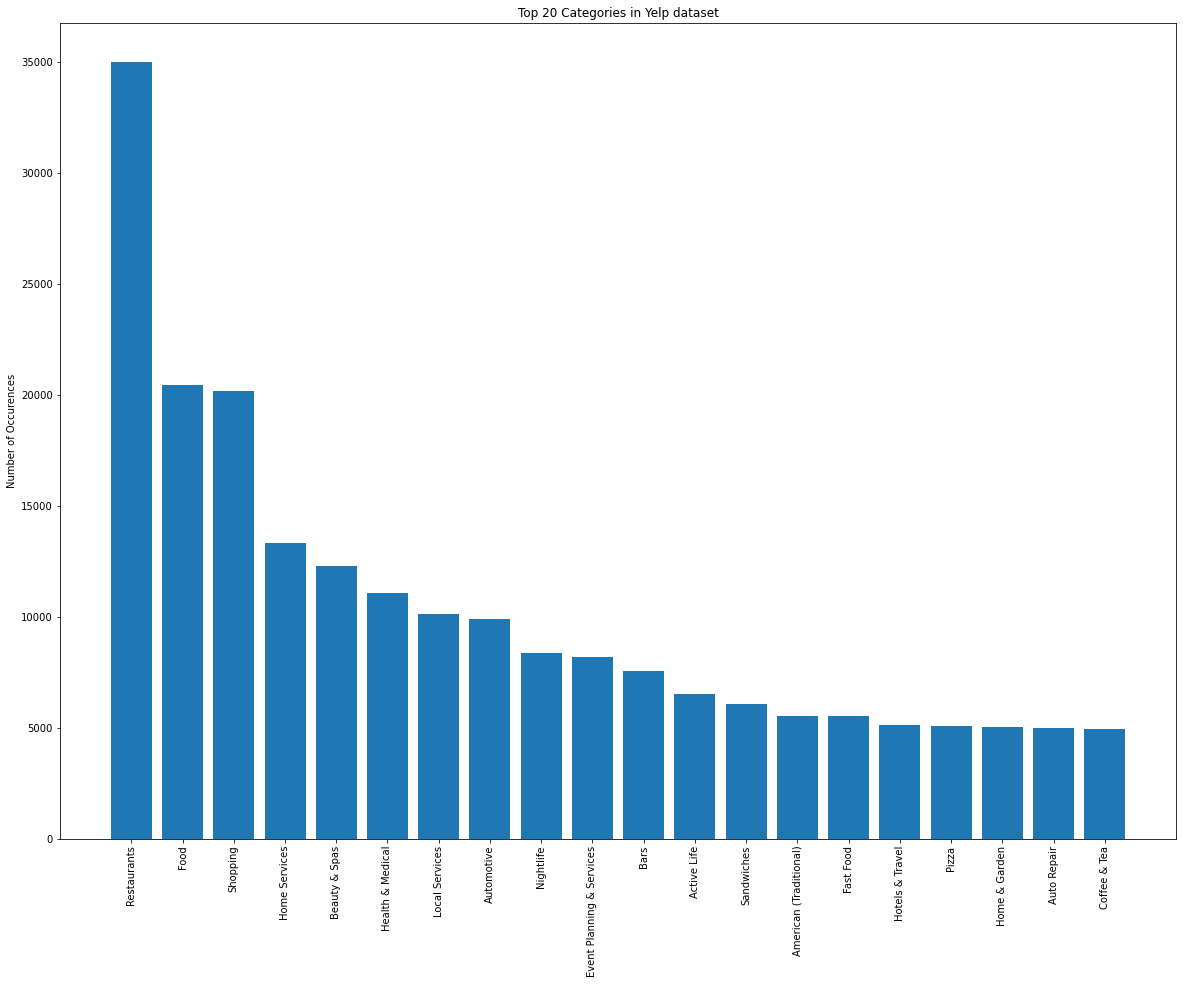

In [187]:
cat = cat[0:20]
objects = list(cat.Categories)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Number of Occurences')
plt.title('Top 20 Categories in Yelp dataset')
plt.show()

In [188]:
business

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471658,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",NaN
150344,150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [189]:
business.reset_index(inplace=True)

In [190]:
business.drop(columns = ['Unnamed: 0'], inplace =True)

In [191]:
b = pd.DataFrame()
category_filter = ['Restaurants' , 'Food' , 'Bars' , 'Sandwiches' , 'Pizza' , 'Coffee & Tea', 'Fast Food']
for index, row in business.categories.items():
    for category in category_filter:
        if category in row:
            b = b.append(business.iloc[index])
            break

In [192]:
bus = b
bus["attributes"][1]

'{\'RestaurantsDelivery\': \'False\', \'OutdoorSeating\': \'False\', \'BusinessAcceptsCreditCards\': \'False\', \'BusinessParking\': "{\'garage\': False, \'street\': True, \'validated\': False, \'lot\': False, \'valet\': False}", \'BikeParking\': \'True\', \'RestaurantsPriceRange2\': \'1\', \'RestaurantsTakeOut\': \'True\', \'ByAppointmentOnly\': \'False\', \'WiFi\': "u\'free\'", \'Alcohol\': "u\'none\'", \'Caters\': \'True\'}'

In [193]:
bus

,address,attributes,business_id,categories,city,hours,index,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,935 Race St,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",3.0,1.0,39.955505,-75.155564,St Honore Pastries,19107,80.0,4.0,PA
2,101 Walnut St,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...",mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",Green Lane,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.0,1.0,40.338183,-75.471658,Perkiomen Valley Brewery,18054,13.0,4.5,PA
3,615 S Main St,"{'BusinessParking': 'None', 'BusinessAcceptsCr...",CF33F8-E6oudUQ46HnavjQ,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",Ashland City,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",5.0,1.0,36.269593,-87.058943,Sonic Drive-In,37015,6.0,2.0,TN
6,2312 Dickerson Pike,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",bBDDEgkFA1Otx9Lfe7BZUQ,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",Nashville,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",9.0,1.0,36.208102,-86.768170,Sonic Drive-In,37207,10.0,1.5,TN
8,NaN,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",eEOYSgkmpB90uNA7lDOMRA,"Vietnamese, Food, Restaurants, Food Trucks",Tampa Bay,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",11.0,1.0,27.955269,-82.456320,Vietnamese Food Truck,33602,10.0,4.0,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119584,19 N Bishop Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",l9eLGG9ZKpLJzboZq-9LRQ,"Restaurants, Sandwiches, Convenience Stores, C...",Clifton Heights,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",150325.0,1.0,39.925656,-75.310344,Wawa,19018,11.0,3.0,PA
119586,1181 N Milwaukee St,"{'WiFi': ""'free'"", 'RestaurantsGoodForGroups':...",cM6V90ExQD6KMSU3rRB5ZA,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",Boise,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '...",150327.0,1.0,43.615401,-116.284689,Dutch Bros Coffee,83704,33.0,4.0,ID
119587,11177 N Oracle Rd,"{'BusinessParking': ""{'garage': False, 'street...",1jx1sfgjgVg0nM6n3p0xWA,"Specialty Food, Food, Coffee & Tea, Coffee Roa...",Oro Valley,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",150328.0,1.0,32.409552,-110.943073,Savaya Coffee Market,85737,41.0,4.5,AZ
119595,1108 S 9th St,"{'WheelchairAccessible': 'False', 'Restaurants...",WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",Philadelphia,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",150336.0,1.0,39.935982,-75.158665,Adelita Taqueria & Restaurant,19147,35.0,4.5,PA


#### Now we shall see the distribution of state in this dataset


In [194]:
state_count = bus.state.value_counts()

In [195]:
state_count = state_count.to_frame().reset_index()
state_count.columns = ['State', 'Counts']

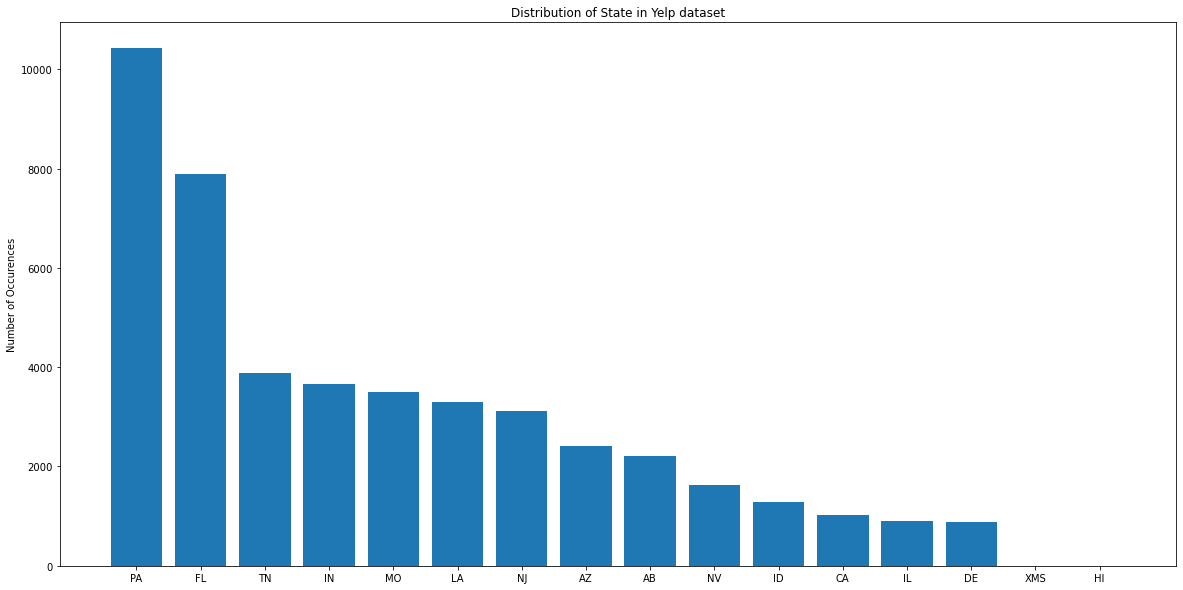

In [196]:
objects = list(state_count.State)
y_pos = np.arange(len(objects))
Numbers = list(state_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of State in Yelp dataset')
plt.show()

##### From this, graph, we see the statewise distribution of restaurants. As we can see, this data consists of restaurants present all over the world. For the sake of simplicity, we will focus on the restaurants present in Pennsylvania.

In [197]:
business_in_PA = bus[bus.state == 'PA']

In [198]:
business_in_PA = business_in_PA.reset_index(drop = True)

In [199]:
business_in_PA

,address,attributes,business_id,categories,city,hours,index,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,935 Race St,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",3.0,1.0,39.955505,-75.155564,St Honore Pastries,19107,80.0,4.0,PA
1,101 Walnut St,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...",mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",Green Lane,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.0,1.0,40.338183,-75.471658,Perkiomen Valley Brewery,18054,13.0,4.5,PA
2,205 Race St,"{'RestaurantsReservations': 'True', 'Restauran...",MUTTqe8uqyMdBl186RmNeA,"Sushi Bars, Restaurants, Japanese",Philadelphia,"{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",15.0,1.0,39.953949,-75.143226,Tuna Bar,19106,245.0,4.0,PA
3,1224 South St,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...",ROeacJQwBeh05Rqg7F6TCg,"Korean, Restaurants",Philadelphia,"{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",19.0,1.0,39.943223,-75.162568,BAP,19147,205.0,4.5,PA
4,10 Rittenhouse Pl,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...",kV_Q1oqis8Qli8dUoGpTyQ,"Pizza, Restaurants",Ardmore,"{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",33.0,1.0,40.006707,-75.289671,Ardmore Pizza,19003,109.0,3.5,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10422,3 Main St,"{'RestaurantsPriceRange2': '2', 'RestaurantsRe...",2dVJ7R-3JMmu2v4DJYtBbw,"Nightlife, Cafes, Hotels, Bars, Hotels & Trave...",Schwenksville,"{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",150269.0,1.0,40.275532,-75.456772,Spring Mount Hotel,19473,5.0,2.0,PA
10423,600 Baltimore Pike,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",Wko0HNelt55ZIp3Dm3eD2g,"Convenience Stores, Sandwiches, Restaurants, F...",Springfield,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",150297.0,1.0,39.920225,-75.325974,Swiss Farms Store,19064,5.0,3.5,PA
10424,6024 Ridge Ave,"{'NoiseLevel': ""u'average'"", 'RestaurantsTakeO...",wVxXRFf10zTTAs11nr4xeA,"Restaurants, Specialty Food, Food, Sandwiches,...",Philadelphia,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",150306.0,1.0,40.032483,-75.214430,PrimoHoagies,19128,55.0,3.0,PA
10425,19 N Bishop Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",l9eLGG9ZKpLJzboZq-9LRQ,"Restaurants, Sandwiches, Convenience Stores, C...",Clifton Heights,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",150325.0,1.0,39.925656,-75.310344,Wawa,19018,11.0,3.0,PA
